# Homework 2
## Yanrong Wu 1801212952

# Problem 1

## 1.Closed form function

Q: Implement a function closed_form_1 that computes this closed form solution given the features 𝐗, labels Y (using Python or Matlab).

In [51]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt

climate_change_1 = pd.read_csv('climate_change_1.csv')
climate_change_1

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,10,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,1983,11,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,1983,12,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,1984,2,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


In [52]:
climate_change_1_train=climate_change_1.iloc[0:284]
#climate_change_1_train
climate_change_1_test=climate_change_1.iloc[284:308]
#climate_change_1_test

In [53]:
def closed_form_1(df: pd.core.frame.DataFrame, column: int = 10)-> np.ndarray:
    X = df.drop(df.columns[column],axis=1).to_numpy()
    X = np.concatenate([np.ones((len(X),1)),X],axis = 1)
    # X: the features
    Y = df.iloc[:,[column]].to_numpy()
    Y = Y.reshape((len(Y)))
    # Y: the results
    theta = inv(X.T @ X)@ X.T @ Y
    return theta

def closed_form_2(X:np.ndarray, Y:np.ndarray)-> np.ndarray:
    theta = inv(X.T @ X)@ X.T @ Y
    return theta

closed_form_1(climate_change_1_train)[1:]

array([ 8.23965077e-03, -3.61230802e-03,  6.44651665e-02,  2.51139083e-03,
        1.87173456e-04, -1.63078511e-02, -6.27428702e-03,  3.42652458e-03,
        9.51816184e-02, -1.54295992e+00])

In [54]:
# Using scipy to check:
from sklearn.linear_model import LinearRegression as lm
X=climate_change_1_train.drop(climate_change_1_train.columns[10],axis=1).to_numpy()
Y=climate_change_1_train.iloc[:,[10]].to_numpy()
l=lm().fit(X,Y)
l.coef_

array([[ 8.23964892e-03, -3.61230811e-03,  6.44651665e-02,
         2.51139097e-03,  1.87173443e-04, -1.63078496e-02,
        -6.27428715e-03,  3.42652470e-03,  9.51816165e-02,
        -1.54295993e+00]])

# 2.R2

Q: Write down the mathematical formula for the linear model and evaluate the model R2 on the training set and the testing set.

In [55]:
r_sq = l.score(X, Y)
r_sq

0.7549422940386257

# 3.Significant Variables

Q: Which variables are significant in the model?

In [56]:
import statsmodels.api as sm
mod = sm.OLS(Y,X)
fit = mod.fit()
p_values = fit.summary2().tables[1]['P>|t|']
p_values

x1     6.334282e-08
x2     1.798940e-03
x3     5.820911e-20
x4     2.569273e-02
x5     7.630079e-01
x6     2.974904e-02
x7     4.331089e-08
x8     1.284179e-08
x9     7.060829e-08
x10    6.742765e-13
Name: P>|t|, dtype: float64

MEI,CO2,N2O,CFC-11,CFC-12,TSI,Aerosols are significant in the model(0.05 significant level).
We can ignore the influence of the year and month later.

# 4. For climate_change_2.csv

Q: Write down the necessary conditions for using the closed form solution. And you can apply it to the dataset climate_change_2.csv, explain the solution is unreasonable.

In [24]:
climate_change_2 = pd.read_csv('climate_change_2.csv')
#climate_change_2

In [25]:
climate_change_2_train=climate_change_2.iloc[0:284]
climate_change_2_test=climate_change_2.iloc[284:308]
closed_form_1(climate_change_2_train)[1:]

array([ 2.01083594e-12, -5.36251599e-12,  5.10582687e-11, -1.28112521e-11,
        1.00000000e-03,  5.87157545e-11,  4.17712392e-12, -3.05891423e-12,
        2.25990338e-11,  1.08553680e-10, -1.01428310e-11])

In [29]:
from sklearn.linear_model import LinearRegression as lm
X=climate_change_2_train.drop(climate_change_2_train.columns[10],axis=1).to_numpy()
Y=climate_change_2_train.iloc[:,[10]].to_numpy()
l=lm().fit(X,Y)
l.coef_

array([[ 1.12051329e-17,  6.66402228e-18,  1.04772243e-17,
         7.73061207e-18,  1.00000000e-03, -1.08634025e-17,
         7.13888333e-18, -6.95792118e-18, -1.76950359e-17,
         1.12119206e-16,  1.91583910e-16]])

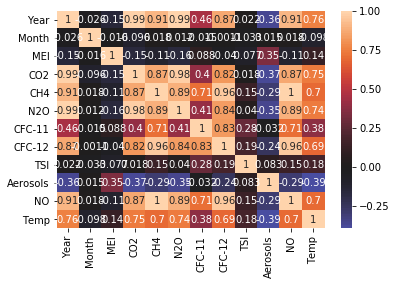

In [28]:
import pandas as pd
climate_change_2_corr = climate_change_2.corr()
# Visualization
import matplotlib.pyplot as mp, seaborn
seaborn.heatmap(climate_change_2_corr, center=0, annot=True)
mp.show()

It can be concluded from the correlation matrix that NO and CH4 are completely linearly correlated, so there is no inverse matrix, and the formula is invalid. So the solution is unreasonable.

# Problem 2----Regularization

# 1.Loss Function

Q: Please write down the loss function for linear model with L1 regularization, L2 regularization, respectively.

In [34]:
#L1 regularization
def L1Norm(l, theta):
    return  np.dot(np.abs(theta), np.ones(theta.size)) * l
 
def L1NormPartial(l, theta):
    return np.sign(theta) * l

# For linear regression, the derivative of J function is:
def __Jfunction(self):        
    sum = 0
    for i in range(0, self.m):
        err = self.__error_dist(self.x[i], self.y[i])
        sum += np.dot(err, err)
        sum += Regularization.L2Norm(0.8, self.theta)
        return 1/(2 * self.m) * sum

In [37]:
#L2 regularization
def L2Norm(l, theta):
    return  np.dot(theta, theta) * l 
 
def L2NormPartial(l, theta):
    return theta * l

# For linear regression, the derivative of J function is:
def __partialderiv_J_func(self):
        sum = 0
        for i in range(0, self.m):
            err = self.__error_dist(self.x[i], self.y[i])
            sum += np.dot(self.x[i], err)
            sum += Regularization.L2NormPartial(0.8, self.theta)
            return 1/self.m * sum

# 2.Closed Form Solution

Q: The closed form solution for linear model with L2 regularization:
𝛉 = (𝐗𝐓𝐗 + 𝛌𝐈)−𝟏𝐗𝐓𝐘
where I is the identity matrix. Write a function closed_form_2 that computes this closed form solution given the features X, labels Y and the regularization parameter λ.

We can answer questions 2 and 4 together.

In [48]:
def closed_form_2():

    dataset = pd.read_csv("climate_change_1.csv")
    X = dataset.get(["MEI","CO2","CH4","N2O","CFC-11","CFC-12","TSI","Aerosols"])

    y = dataset.get("Temp")
  
    X = np.column_stack((X,np.ones(len(X))))

    for lambda1 in [10,1,0.1,0.01,0.001]:
        X_train = X[:284]
        X_test = X[284:]
        y_train = y[:284]
        y_test = y[284:]
    
        X_train=np.mat(X_train)
        y_train = np.mat(y_train).T
        xTx = X_train.T*X_train
        w = 0
        print("="*25+"L2 Regularization (lambda is "+str(lambda1)+")"+"="*25)
        I_m= np.eye(X_train.shape[1])
        if np.linalg.det(xTx+lambda1*I_m)==0.0:
            print("xTx is invertible")
        else:
            print(np.linalg.det(xTx+lambda1*I_m))
            w= (xTx+lambda1*I_m).I*(X_train.T*y_train)
        wights = np.ravel(w)    
        y_train_pred = np.ravel(np.mat(X_train)*np.mat(w))
        y_test_pred = np.ravel(np.mat(X_test)*np.mat(w))
        coef_=wights[:-1]
        intercept_=wights[-1]

        X_train = np.ravel(X_train).reshape(-1,9)
        y_train = np.ravel(y_train)
        
        print("Coefficient: ",coef_)
        print("Intercept: ",intercept_)
        print("the model is： y = ",coef_,"* X +(",intercept_,")")
        y_train_avg = np.average(y_train)
    
        R2_train = 1-(np.average((y_train-y_train_pred)**2))/(np.average((y_train-y_train_avg)**2))
        print("R2 in Train ： ",R2_train)
     
        y_test_avg = np.average(y_test)
        R2_test = 1-(np.average((y_test-y_test_pred)**2))/(np.average((y_test-y_test_avg)**2))
        print("R2 in Test ： ",R2_test)

closed_form_2()

=========================L2 Regularization (lambda is 10)=========================
4.052005289688253e+33
Coefficient:  [ 0.04054315  0.00814554  0.00020508 -0.01608137 -0.00636145  0.003689
  0.00126458 -0.02443305]
Intercept:  -0.00022022058288633274
the model is： y =  [ 0.04054315  0.00814554  0.00020508 -0.01608137 -0.00636145  0.003689
  0.00126458 -0.02443305] * X +( -0.00022022058288633274 )
R2 in Train ：  0.6803719394071281
R2 in Test ：  -0.7061640575416965
=========================L2 Regularization (lambda is 1)=========================
4.182558175861993e+31
Coefficient:  [ 0.04395558  0.00804313  0.00021395 -0.01693027 -0.00646627  0.00376881
  0.00146759 -0.21177258]
Intercept:  -0.0022945422838525635
the model is： y =  [ 0.04395558  0.00804313  0.00021395 -0.01693027 -0.00646627  0.00376881
  0.00146759 -0.21177258] * X +( -0.0022945422838525635 )
R2 in Train ：  0.6897571586198687
R2 in Test ：  -0.5861726468586046
=========================L2 Regularization (lambda is 0.1)===

# 3.Comparasion

Q: Compare the two solutions in problem 1 and problem 2 and explain the reason why linear model with L2 regularization is robust. (using climate_change_1.csv)

It will reduce the coefficient of unimportant prediction factors close to 0 and avoid overfitting. In L2 model, it is less sensitive to single variable, so it is more robust.

# 4.Change the regularization parameter λ

Q: You can change the regularization parameter λ to get different solutions for this problem. Suppose we set λ = 10, 1, 0.1, 0.01, 0.001, and please evaluate the model R2 on the training set and the testing set. Finally, please decide the best regularization parameter λ. (Note that: As a qualified data analyst, you must know how to choose model parameters, please learn about cross validation methods.)

The anwser can see the above(in Q2).

# Problem 3 — Feature Selection

# 1.Workflow

Q: From Problem 1, you can know which variables are significant, therefore you can use less variables to train model. For example, remove highly correlated and redundant features. You can propose a workflow to select feature.

Solution:
For m features, from k=1 to k = m:
We can choose k features from m features, and establish C (m, K) models, then choose the best one (MSE minimum or R2 maximum);
Then select an optimal model from the m optimal models.

# 2.Better Model

Train a better model than the model in Problem 2.

In [41]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model

#Variance Inflation Factor
def vif(X, thres=10.0):
    col = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:,col].values, ix) for ix in range(X.iloc[:,col].shape[1])]
        maxvif = max(vif)
        maxix = vif.index(maxvif)
        if maxvif > thres:
            del col[maxix]
            print('delete=',X.columns[col[maxix]],'  ', 'vif=',maxvif )
            dropped = True
    print('Remain Variables:', list(X.columns[col]))
    print('VIF:', vif)
    return list(X.columns[col]) 

dataset = pd.read_csv("climate_change_1.csv")
X = dataset.get(["MEI","CO2","CH4","N2O","CFC-11","CFC-12","TSI","Aerosols"])

y = dataset.get("Temp")

X_train = X[:284]
X_test = X[284:]
y_train = y[:284]
y_test = y[284:]
d = vif(X_train)
print(d)

X = dataset.get( ['MEI', 'CFC-12', 'Aerosols'])
y = dataset.get("Temp")
X_train = X[:284]
X_test = X[284:]
y_train = y[:284]
y_test = y[284:]

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
print('coefficients(b1,b2...):',regr.coef_)
print('intercept(b0):',regr.intercept_)
y_train_pred = regr.predict(X_train)
       
R2_1 = regr.score(X_train, y_train)
print(R2_1)
R2_2 = regr.score(X_test, y_test)
print(R2_2)

delete= CFC-11    vif= 239743.2424704495
delete= Aerosols    vif= 29867.18540477364
delete= CFC-11    vif= 11884.79599294173
delete= CFC-12    vif= 502.06957361985695
delete= CFC-12    vif= 122.31236225671839
Remain Variables: ['MEI', 'CFC-12', 'Aerosols']
VIF: [1.2888871669460935, 1.33868239281389, 1.48103752609454]
['MEI', 'CFC-12', 'Aerosols']
coefficients(b1,b2...): [ 5.54993375e-02  1.86365387e-03 -2.08242114e+00]
intercept(b0): -0.6553255026654846
0.5996443150479794
0.004717686204946725


# Problem 4 — Gradient Descent

Gradient descent algorithm is an iterative process that takes us to the minimum of a function. Please write down the iterative expression for updating the solution of linear model and implement it using Python or Matlab in gradientDescent function.

theta = [[-0.07698894]
 [ 0.29450977]
 [ 0.28935427]
 [ 0.02211171]
 [-0.27724073]
 [-0.53156629]
 [ 0.7376296 ]
 [ 0.17604596]
 [-0.22725924]]
final theta  [[-0.09315388  0.26327692  0.20584575  0.05590722  0.1773908  -0.10907193
   0.09177624  0.13999486 -0.2096555 ]]
cost  [0.04678781 0.04652792 0.04626986 ... 0.00428416 0.00428416 0.00428416]


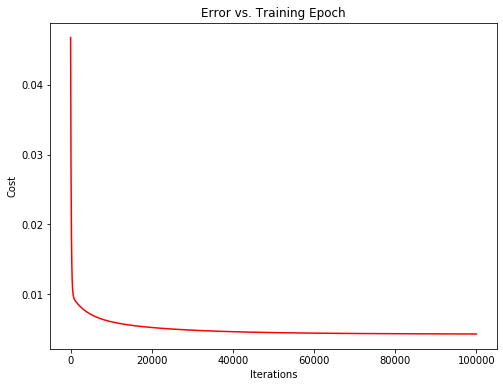

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def costFunc(X,Y,theta):
    #cost func
    inner=np.power((X*theta.T)-Y,2)
    return np.sum(inner)/(2*len(X))

def gradientDescent(X,Y,theta,alpha,iters):
    temp = np.mat(np.zeros(theta.shape))
    cost = np.zeros(iters)
    thetaNums = int(theta.shape[1])
    
    for i in range(iters):
        error = (X*theta.T-Y)
        for j in range(thetaNums):
            derivativeInner = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j]-(alpha*np.sum(derivativeInner)/len(X))
        theta = temp
        cost[i]=costFunc(X,Y,theta)
    return theta,cost


dataset = pd.read_csv("climate_change_1.csv")
X = dataset.get(["MEI","CO2","CH4","N2O","CFC-11","CFC-12","TSI","Aerosols"])

y = dataset.get("Temp")
X = np.column_stack((np.ones(len(X)),X))
X_train = X[:284]
X_test = X[284:]
y_train = y[:284]
y_test = y[284:]

X_train = np.mat(X_train)  
Y_train = np.mat(y_train).T

for i in range(1,9):
    X_train[:,i] = (X_train[:,i] - min(X_train[:,i])) / (max(X_train[:,i]) - min(X_train[:,i]))

theta_n = (X_train.T*X_train).I*X_train.T*Y_train
print("theta =",theta_n)
theta = np.mat([0,0,0,0,0,0,0,0,0])
iters = 100000
alpha = 0.001

finalTheta,cost = gradientDescent(X_train,Y_train,theta,alpha,iters)
print("final theta ",finalTheta)
print("cost ",cost)

fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(iters), cost, 'r') 
bx.set_xlabel('Iterations') 
bx.set_ylabel('Cost') 
bx.set_title('Error vs. Training Epoch') 
plt.show()